<center><img src="https://i.imgur.com/zRrFdsf.png" width="700"></center>

# The Thematic map

Last session we opened this map:

In [191]:
import geopandas as gpd

linkGitSession='https://github.com/CienciaDeDatosEspacial/dataSets/raw/main/'
linkCountries='WORLD/World_Countries.zip'

fullLinkCountries=linkGitSession+linkCountries
countries=gpd.read_file(fullLinkCountries)
countries

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
...,...,...
247,South Sudan,"POLYGON ((34.21807 9.96458, 34.20722 9.905, 34..."
248,Indonesia,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832..."
249,East Timor,"MULTIPOLYGON (((124.41824 -9.3001, 124.40446 -..."
250,Curacao (Netherlands),"POLYGON ((-68.96556 12.19889, -68.91196 12.181..."


As you see, the GDF above has just two colums; enough to plot a map, but no more than that.

Let me open a DF:

In [192]:
import pandas as pd

someDataLink='WORLD/some_dataworld.csv'

someData=pd.read_csv(linkGitSession+someDataLink)

someData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       171 non-null    object 
 1   iso2          170 non-null    object 
 2   iso3          171 non-null    object 
 3   region        171 non-null    object 
 4   fragility     171 non-null    float64
 5   co2           171 non-null    int64  
 6   sq_km         171 non-null    int64  
 7   num_airports  171 non-null    int64  
 8   population    171 non-null    int64  
 9   mobiles       171 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 13.5+ KB


# Pre Processing

The DF has some interesting numerical data (_float64_):
* fragility: fragility index 2023 -[details here](https://fragilestatesindex.org/2023/06/14/fragile-states-index-2023-annual-report/)
* co2: metric tonnes of CO2 emmitted -[details here](https://www.cia.gov/the-world-factbook/field/carbon-dioxide-emissions/country-comparison/)
* sq_km: country area -[details here](https://www.cia.gov/the-world-factbook/field/area/country-comparison/)
* num_airports: count of airports in the country -[details here](https://www.cia.gov/the-world-factbook/field/airports/country-comparison/)
* population: country population  -[details here](https://www.cia.gov/the-world-factbook/field/population/country-comparison/)
* mobiles: total number of mobile cellular telephone subscribers -[details here](https://www.cia.gov/the-world-factbook/field/telephones-mobile-cellular/country-comparison/)

There are also other columns that may be of help:

In [193]:
someData.head()

,Country,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles
0,AFGHANISTAN,AF,AFG,SOUTH ASIA,105.0,7893000,652230,68,40121552,23000000
1,ALBANIA,AL,ALB,EUROPE,58.9,3794000,28748,3,3107100,2610000
2,ALGERIA,DZ,DZA,AFRICA,75.4,151633000,2381740,95,47022473,51500000
3,ANGOLA,AO,AGO,AFRICA,87.8,19362000,1246700,107,37202061,25700000
4,ANTIGUA AND BARBUDA,AG,ATG,CENTRAL AMERICA AND THE CARIBBEAN,54.4,729000,443,4,102634,184000


Preparing thematic maps requires social data about the geometry (line, polygon, point). The object **countries** has no social data, so the preprocessing requires geomerging.

## Geo Merging

This is a critical preprocessing operation, as it is in charge of combining data sets, in this case combine a DF into a GDF. Some rules are needed:

* There is at least one common column needed to serve for the matches.
* The common columns, or KEYs, need contents to be written exactly in both columns.
* It is recommended that both KEYs are named the same.

Here we have the KEYs:

In [194]:
countries.COUNTRY.head()

0    Aruba (Netherlands)
1    Antigua and Barbuda
2            Afghanistan
3                Algeria
4             Azerbaijan
Name: COUNTRY, dtype: object

In [195]:
someData.Country.head()

0            AFGHANISTAN
1                ALBANIA
2                ALGERIA
3                 ANGOLA
4    ANTIGUA AND BARBUDA
Name: Country, dtype: object

Let's solve the name differences for the KEYs:

In [196]:
countries.rename(columns={'COUNTRY':'Country'},inplace=True)

We can notice the different *case* in the KEYs. Let's work with uppercases:

In [197]:
countries['Country']=countries.Country.str.upper()

It is very unlikely the names are written the same. Let's verify:

In [198]:
onlyDF=set(someData.Country)- set(countries.Country)
onlyGDF=set(countries.Country)- set(someData.Country)

Check here:

In [199]:
onlyDF # they did not find a match in the MAP GDF!

{'BAHAMAS (THE)',
 'BOLIVIA (PLURINATIONAL STATE OF)',
 'BRUNEI DARUSSALAM',
 'CABO VERDE',
 'CENTRAL AFRICAN REPUBLIC (THE)',
 'COMOROS (THE)',
 'CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
 'CONGO (THE)',
 "CÔTE D'IVOIRE",
 'DOMINICAN REPUBLIC (THE)',
 'ESWATINI',
 'GAMBIA (THE)',
 'IRAN (ISLAMIC REPUBLIC OF)',
 'KOREA (THE REPUBLIC OF)',
 "LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",
 'MICRONESIA (FEDERATED STATES OF)',
 'MOLDOVA (THE REPUBLIC OF)',
 'NETHERLANDS (THE)',
 'NIGER (THE)',
 'NORTH MACEDONIA',
 'NORTHERN MARIANA ISLANDS (THE)',
 'PHILIPPINES (THE)',
 'RUSSIAN FEDERATION (THE)',
 'SAMOA',
 'SUDAN (THE)',
 'TANZANIA, THE UNITED REPUBLIC OF',
 'TIMOR-LESTE',
 'UNITED ARAB EMIRATES (THE)',
 'UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND (THE)',
 'UNITED STATES OF AMERICA (THE)'}

There are several countries in the DF that did not find a match in the GDF (map). Of course, most of them are in the map, let's see why they were not matched.

### Fuzzy merging

We use this technique to detect similarities between strings. You need this package **thefuzz**:

In [200]:
# !pip install thefuzz

This is the basic idea:

In [201]:
from thefuzz.process import extractOne as best

## find the BEST match to 'BAHAMAS (THE)'
## from all strings in 'onlyGDF'

best('BAHAMAS (THE)',onlyGDF)

('BAHAMAS', 90)

As you see, you get 90% match between those strings. That may be a reliable result.

Let's do the same for all the unmatched countries:

In [202]:
## for each country in onlyDF, find the BEST match in onlyGDF

[(country, best(country,onlyGDF)) for country in onlyDF]

[('KOREA (THE REPUBLIC OF)', ('NORTH KOREA', 86)),
 ('BAHAMAS (THE)', ('BAHAMAS', 90)),
 ('UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND (THE)',
  ('UNITED KINGDOM', 90)),
 ('UNITED STATES OF AMERICA (THE)', ('UNITED STATES', 90)),
 ('PHILIPPINES (THE)', ('PHILIPPINES', 95)),
 ('RUSSIAN FEDERATION (THE)', ('RUSSIA', 90)),
 ('MOLDOVA (THE REPUBLIC OF)', ('MOLDOVA', 90)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81)),
 ('NETHERLANDS (THE)', ('NETHERLANDS', 95)),
 ('NORTH MACEDONIA', ('MACEDONIA', 90)),
 ('ESWATINI', ('LIECHTENSTEIN', 60)),
 ('CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
  ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('DOMINICAN REPUBLIC (THE)', ('DOMINICAN REPUBLIC', 95)),
 ('TANZANIA, THE UNITED REPUBLIC OF', ('TANZANIA', 90)),
 ('BOLIVIA (PLURINATIONAL STATE OF)', ('BOLIVIA', 90)),
 ('NIGER (THE)', ('NIGER', 90)),
 ('CENTRAL AFRICAN REPUBLIC (THE)', ('CENTRAL AFRICAN REPUBLIC', 95)),
 ('GAMBIA (THE)', ('GAMBIA', 90)),
 ('NORTHERN MARIANA ISLANDS (THE)', ('NORTHERN MARIANA ISL

Each element in the *list* above in in parentheses, for instance:

```
('TIMOR-LESTE', ('EAST TIMOR', 81))
```

That element has two elements:


*   **'TIMOR-LESTE'** from *onlyDF*, and
*   **('EAST TIMOR', 81)** which is the result from _best(country,onlyGDF)_. This last element, as we just saw above, shows the best match and the level of similarity (the higher the more similar).

We can prepare a list where each element has three elements:



In [203]:
#or
[(country, best(country,onlyGDF)[0],best(country,onlyGDF)[1]) for country in onlyDF]

[('KOREA (THE REPUBLIC OF)', 'NORTH KOREA', 86),
 ('BAHAMAS (THE)', 'BAHAMAS', 90),
 ('UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND (THE)',
  'UNITED KINGDOM',
  90),
 ('UNITED STATES OF AMERICA (THE)', 'UNITED STATES', 90),
 ('PHILIPPINES (THE)', 'PHILIPPINES', 95),
 ('RUSSIAN FEDERATION (THE)', 'RUSSIA', 90),
 ('MOLDOVA (THE REPUBLIC OF)', 'MOLDOVA', 90),
 ('TIMOR-LESTE', 'EAST TIMOR', 81),
 ('NETHERLANDS (THE)', 'NETHERLANDS', 95),
 ('NORTH MACEDONIA', 'MACEDONIA', 90),
 ('ESWATINI', 'LIECHTENSTEIN', 60),
 ('CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
  'DEMOCRATIC REPUBLIC OF THE CONGO',
  95),
 ('DOMINICAN REPUBLIC (THE)', 'DOMINICAN REPUBLIC', 95),
 ('TANZANIA, THE UNITED REPUBLIC OF', 'TANZANIA', 90),
 ('BOLIVIA (PLURINATIONAL STATE OF)', 'BOLIVIA', 90),
 ('NIGER (THE)', 'NIGER', 90),
 ('CENTRAL AFRICAN REPUBLIC (THE)', 'CENTRAL AFRICAN REPUBLIC', 95),
 ('GAMBIA (THE)', 'GAMBIA', 90),
 ('NORTHERN MARIANA ISLANDS (THE)', 'NORTHERN MARIANA ISLANDS (US)', 91),
 ('UNITED ARAB E

For instace, this element has 3 elements:

```
 ('IRAN (ISLAMIC REPUBLIC OF)', 'IRAN', 90)
```

The level of similarity would guide us to make update (replace) the strings in one of the KEYs, so that the merging process works properly.

Then, it would be better if we have a data frame instead of a list:

In [204]:
pd.DataFrame([(country, best(country,onlyGDF)[0],best(country,onlyGDF)[1]) for country in onlyDF])

,0,1,2
0,KOREA (THE REPUBLIC OF),NORTH KOREA,86
1,BAHAMAS (THE),BAHAMAS,90
2,UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...,UNITED KINGDOM,90
3,UNITED STATES OF AMERICA (THE),UNITED STATES,90
4,PHILIPPINES (THE),PHILIPPINES,95
5,RUSSIAN FEDERATION (THE),RUSSIA,90
6,MOLDOVA (THE REPUBLIC OF),MOLDOVA,90
7,TIMOR-LESTE,EAST TIMOR,81
8,NETHERLANDS (THE),NETHERLANDS,95
9,NORTH MACEDONIA,MACEDONIA,90


Let's sort by the column '2' (the third):

In [205]:
pd.DataFrame([(country, best(country,onlyGDF)[0],best(country,onlyGDF)[1]) for country in onlyDF]).sort_values(by=2)

,0,1,2
28,CÔTE D'IVOIRE,IVORY COAST,58
10,ESWATINI,LIECHTENSTEIN,60
22,CABO VERDE,CAPE VERDE,80
7,TIMOR-LESTE,EAST TIMOR,81
0,KOREA (THE REPUBLIC OF),NORTH KOREA,86
21,LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE),DOMINICAN REPUBLIC,86
27,SUDAN (THE),SUDAN,90
26,SAMOA,AMERICAN SAMOA (US),90
25,CONGO (THE),CONGO,90
24,BRUNEI DARUSSALAM,BRUNEI,90


The previous result helps make a plan based on these cases:
* **ESWATINI** is always a problem, because it is also *SWAZILAND*.
* **KOREA (THE REPUBLIC OF)** is not _NORTH KOREA_.
* **LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)** is too long to match *LAOS* (if it exists in the map like that).
* **SAMOA** is always a problem, because it is also *WESTERN SAMOA*.

Based on this, we should see what our GDF has:

In [206]:
countries.Country[countries.Country.str.contains('SWAZ|LAO|SAMOA|KORE')]

9      AMERICAN SAMOA (US)
120            NORTH KOREA
122            SOUTH KOREA
126                   LAOS
242          WESTERN SAMOA
243              SWAZILAND
Name: Country, dtype: object

Then, it makes sense to change those manually (notice the 'replace' uses Python dictionaries):

In [207]:
# this is a {dictionary}

manualChanges={'SWAZILAND':'ESWATINI',
               'LAOS':"LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",
               'SOUTH KOREA':'KOREA (THE REPUBLIC OF)',
               'WESTERN SAMOA':'SAMOA',
              }

countries.replace(to_replace={'Country':manualChanges},inplace=True)

At this stage, we should recompute the differences:

In [208]:
# updating
onlyDF=set(someData.Country)- set(countries.Country)
onlyGDF=set(countries.Country)- set(someData.Country)

An re run this code:

In [209]:
# keeping high scores

pd.DataFrame([(country, best(country,onlyGDF)[0],best(country,onlyGDF)[1]) for country in onlyDF]).sort_values(2)

,0,1,2
24,CÔTE D'IVOIRE,IVORY COAST,58
19,CABO VERDE,CAPE VERDE,80
6,TIMOR-LESTE,EAST TIMOR,81
0,BAHAMAS (THE),BAHAMAS,90
23,SUDAN (THE),SUDAN,90
22,CONGO (THE),CONGO,90
21,BRUNEI DARUSSALAM,BRUNEI,90
20,COMOROS (THE),COMOROS,90
15,GAMBIA (THE),GAMBIA,90
13,NIGER (THE),NIGER,90


All this is correct now!

Let's prepare the changes:

In [210]:
# new {dictionary}
changesToDF={country: best(country,onlyGDF)[0] for country in onlyDF}
changesToDF

{'BAHAMAS (THE)': 'BAHAMAS',
 'UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND (THE)': 'UNITED KINGDOM',
 'UNITED STATES OF AMERICA (THE)': 'UNITED STATES',
 'PHILIPPINES (THE)': 'PHILIPPINES',
 'RUSSIAN FEDERATION (THE)': 'RUSSIA',
 'MOLDOVA (THE REPUBLIC OF)': 'MOLDOVA',
 'TIMOR-LESTE': 'EAST TIMOR',
 'NETHERLANDS (THE)': 'NETHERLANDS',
 'NORTH MACEDONIA': 'MACEDONIA',
 'CONGO (THE DEMOCRATIC REPUBLIC OF THE)': 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'DOMINICAN REPUBLIC (THE)': 'DOMINICAN REPUBLIC',
 'TANZANIA, THE UNITED REPUBLIC OF': 'TANZANIA',
 'BOLIVIA (PLURINATIONAL STATE OF)': 'BOLIVIA',
 'NIGER (THE)': 'NIGER',
 'CENTRAL AFRICAN REPUBLIC (THE)': 'CENTRAL AFRICAN REPUBLIC',
 'GAMBIA (THE)': 'GAMBIA',
 'NORTHERN MARIANA ISLANDS (THE)': 'NORTHERN MARIANA ISLANDS (US)',
 'UNITED ARAB EMIRATES (THE)': 'UNITED ARAB EMIRATES',
 'MICRONESIA (FEDERATED STATES OF)': 'FEDERATED STATES OF MICRONESIA',
 'CABO VERDE': 'CAPE VERDE',
 'COMOROS (THE)': 'COMOROS',
 'BRUNEI DARUSSALAM': 'BRUN

In [211]:
someData.replace(to_replace={'Country':changesToDF},inplace=True)

What is left to match?

In [212]:
# updating
onlyDF=set(someData.Country)- set(countries.Country)
onlyGDF=set(countries.Country)- set(someData.Country)
[(country, best(country,onlyGDF)) for country in onlyDF]

[]

Once you are here, merging can proceed:

In [213]:
## GDF to the 'left'
theMapAndData=countries.merge(someData, on='Country')
theMapAndData

,Country,geometry,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles
0,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",AG,ATG,CENTRAL AMERICA AND THE CARIBBEAN,54.4,729000,443,4,102634,184000
1,AFGHANISTAN,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",AF,AFG,SOUTH ASIA,105.0,7893000,652230,68,40121552,23000000
2,ALGERIA,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236...",DZ,DZA,AFRICA,75.4,151633000,2381740,95,47022473,51500000
3,AZERBAIJAN,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38...",AZ,AZE,MIDDLE EAST,73.2,35389000,86600,32,10650239,11000000
4,ALBANIA,"POLYGON ((20.79192 40.43154, 20.78722 40.39472...",AL,ALB,EUROPE,58.9,3794000,28748,3,3107100,2610000
...,...,...,...,...,...,...,...,...,...,...,...
166,ZAMBIA,"POLYGON ((30.21302 -14.98172, 30.21917 -15.096...",ZM,ZMB,AFRICA,85.7,6798000,752618,120,20799116,21200000
167,ZIMBABWE,"POLYGON ((32.48888 -21.34445, 32.46541 -21.325...",ZW,ZWE,AFRICA,99.5,7902000,390757,144,17150352,15000000
168,SOUTH SUDAN,"POLYGON ((34.21807 9.96458, 34.20722 9.905, 34...",SS,SSD,AFRICA,112.2,1778000,644329,89,12703714,6170000
169,INDONESIA,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832...",ID,IDN,EAST AND SOUTHEAST ASIA,70.4,563543000,1904569,556,281562465,352000000


And our GDF has social data now!

In [214]:
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Country       171 non-null    object  
 1   geometry      171 non-null    geometry
 2   iso2          170 non-null    object  
 3   iso3          171 non-null    object  
 4   region        171 non-null    object  
 5   fragility     171 non-null    float64 
 6   co2           171 non-null    int64   
 7   sq_km         171 non-null    int64   
 8   num_airports  171 non-null    int64   
 9   population    171 non-null    int64   
 10  mobiles       171 non-null    int64   
dtypes: float64(1), geometry(1), int64(5), object(4)
memory usage: 14.8+ KB


# Thematics: the DDM (Dot Density Map)

You have a DDM if you use dot to show comparatively which polygon of a map has 'more' (or 'less') of some countable phenomenon of interest. 
A dot is an aggregated value, but it is constant for each dot.

We have the world map, let's keep Africa:

In [215]:
theMapAndData.region.value_counts()

region
AFRICA                               51
EUROPE                               37
CENTRAL AMERICA AND THE CARIBBEAN    16
MIDDLE EAST                          16
EAST AND SOUTHEAST ASIA              15
SOUTH AMERICA                        12
SOUTH ASIA                            8
AUSTRALIA AND OCEANIA                 7
CENTRAL ASIA                          6
NORTH AMERICA                         3
Name: count, dtype: int64

<Axes: >

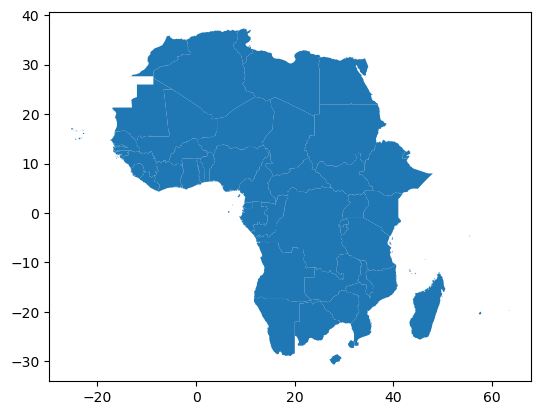

In [216]:
# then

Africa=theMapAndData[theMapAndData.region=='AFRICA']
Africa.plot()

A DDM can serve as an effective way to show the distribution of people. The most critical tasks are:

* Dot Placement: The dots should be randomly distributed within each polygon to avoid misrepresenting the data.

* Dot Unit: Deciding how many people each dot should represent is key for visual clarity. This value should be chosen carefully to avoid oversaturation or sparsity.

The size of all dots on the map must be the same to ensure a consistent visual comparison.

This is a DOT UNIT proposal:

In [217]:
justDots=Africa.copy()
dot_value = 100000
justDots['num_dots'] = (justDots['population'] / dot_value).astype(int)

And here, we get a location for the dots:

In [218]:
# 2. Generate the random dot locations using .sample_points()
# The 'size' parameter can take a Series of integers, which is exactly what 'num_dots' is.
justDots = justDots.sample_points(size=justDots['num_dots']).explode(index_parts=True)

You get this:

In [219]:
justDots

2    0      POINT (-8.56301 27.71513)
     1      POINT (-8.49875 27.43895)
     2      POINT (-8.38804 27.93169)
     3      POINT (-8.14322 28.53386)
     4      POINT (-7.69166 28.84238)
                      ...            
168  122      POINT (33.98478 4.7585)
     123     POINT (34.40789 5.99844)
     124     POINT (34.79429 6.44152)
     125     POINT (34.92525 5.86658)
     126      POINT (35.5994 5.16866)
Name: sampled_points, Length: 14030, dtype: geometry

In [220]:
# what is it?
type(justDots)

geopandas.geoseries.GeoSeries

Notice the multi index (MI), one for a country and for a dot. As we are planing to send these points to R, we avoid MI:

In [221]:
justDots.reset_index(drop=True, inplace=True)
Africa_dots=gpd.GeoDataFrame(geometry=justDots)
Africa_dots

,geometry
0,POINT (-8.56301 27.71513)
1,POINT (-8.49875 27.43895)
2,POINT (-8.38804 27.93169)
3,POINT (-8.14322 28.53386)
4,POINT (-7.69166 28.84238)
...,...
14025,POINT (33.98478 4.7585)
14026,POINT (34.40789 5.99844)
14027,POINT (34.79429 6.44152)
14028,POINT (34.92525 5.86658)


Now you have a GDF:

In [222]:
Africa_dots.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 14030 entries, 0 to 14029
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  14030 non-null  geometry
dtypes: geometry(1)
memory usage: 109.7 KB


Juts plot the polygons as the base, and the points as the layer on top!

<Axes: >

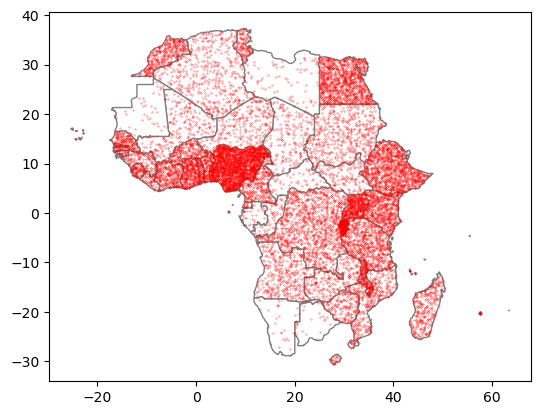

In [223]:
base=Africa.plot(facecolor="white",#color of polygon fill
               edgecolor='grey') #color of border                
Africa_dots.plot(markersize=0.05, color='red',ax=base)

It is generally recommended that DDMs use an **equal-area projection**, which benefits density and limits area distortion.

<Axes: >

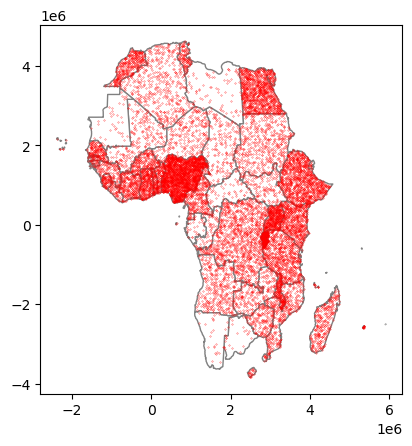

In [224]:
base=Africa.to_crs(8857).plot(facecolor="white",
                              edgecolor='grey')
Africa_dots.to_crs(8857).plot(markersize=0.05, color='red',ax=base)

Let's keep the continent countries with that crs:

In [225]:
Africa_8857=Africa.to_crs(8857)

# Africa.to_crs(8857).to_file("africa_8857.gpkg",driver='GPKG',layer='countries')
# Africa_dots.to_crs(8857).to_file("africa_8857.gpkg",driver='GPKG',layer='dotdensity')

# Thematics: the PSM (Proportional Symbol Map)

You have a PSM if you use a symbol (generally a circle) to show the distribution of a variable per location.
The symbol is an aggregated raw value, and its size varies according to those values. So now we need:

1. A location for a symbol, generally the polygon centroid.

In [226]:
Africa_8857_centroids = Africa_8857.copy()

# Africa_8857_centroids will have a new geometry:
Africa_8857_centroids['geometry'] = Africa_8857_centroids['geometry'].centroid

2. A size of varying values (not constant as in DDMs). Let's use population again.

In [227]:
Africa_8857_centroids['size'] = Africa_8857_centroids['population'].apply(lambda x: x**0.5/100)

## or
# import numpy as np
# Africa_8857_centroids['size'] = Africa_8857_centroids['population'].apply(lambda x: np.log10(x))

We got the basics, then:

<Axes: >

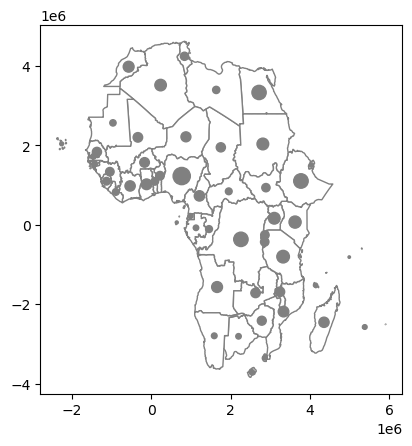

In [228]:
base=Africa_8857.plot(facecolor="white",
                      edgecolor='grey')
# Plot the centroids on top
Africa_8857_centroids.plot(
    ax=base,
    markersize=Africa_8857_centroids['size'],
    color='grey'
)

PPMs are not thematic maps to see precise values, but to reveal clear differences on the variable distribution used. As, human eyes are very limited to detect area differences, we may need to use some other tactics to help uncover some patterns.

For example, let's confirm if we have outliers:

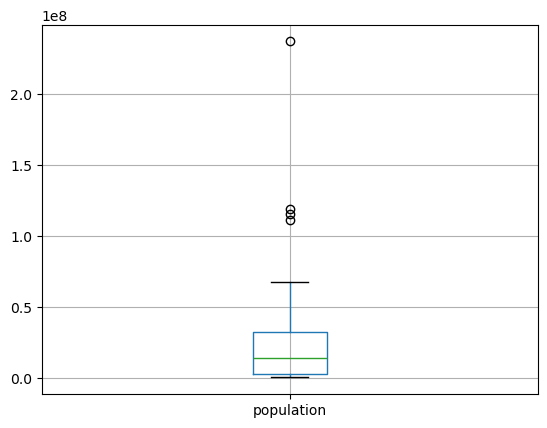

In [229]:
boxplotInfo=Africa_8857_centroids.boxplot(column='population',return_type="dict")

The object **boxplotInfo** showed the boxplot, and we confirm there are outliers. We can recover them like this:

In [230]:
outliers=boxplotInfo['fliers'][0].get_ydata()
## see
outliers

array([115403027, 111247248, 118550298, 236747130], dtype=object)

Then, these are the outlying countries:

In [231]:
Africa_8857_centroids[Africa_8857_centroids.population.isin(outliers)]

,Country,geometry,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles,size
32,DEMOCRATIC REPUBLIC OF THE CONGO,POINT (2261167.581 -366628.064),CD,COD,AFRICA,110.2,2653000,2344858,273,115403027,49800000,107.425801
48,EGYPT,POINT (2718439.633 3332479.727),EG,EGY,AFRICA,88.4,235137000,1001450,73,111247248,106000000,105.473811
53,ETHIOPIA,POINT (3773637.19 1103137.24),ET,ETH,AFRICA,94.2,16798000,1104300,58,118550298,71400000,108.880805
112,NIGERIA,POINT (770395.209 1227428.411),NG,NGA,AFRICA,98.5,104494000,923768,50,236747130,224000000,153.865893


Knowing this information, we can create a column as outlier flag:

In [232]:
Africa_8857_centroids['population_outlier']=Africa_8857_centroids.population.isin(outliers)*1

## see
Africa_8857_centroids

,Country,geometry,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles,size,population_outlier
2,ALGERIA,POINT (238502.141 3518510.55),DZ,DZA,AFRICA,75.4,151633000,2381740,95,47022473,51500000,68.572934,0
6,ANGOLA,POINT (1660973.947 -1567698.855),AO,AGO,AFRICA,87.8,19362000,1246700,107,37202061,25700000,60.993492,0
12,BOTSWANA,POINT (2201221.267 -2809166.362),BW,BWA,AFRICA,59.5,5965000,581730,122,2450668,4440000,15.654610,0
19,BENIN,POINT (222846.461 1235558.191),BJ,BEN,AFRICA,73.6,6903000,112622,10,14697052,16400000,38.336734,0
26,BURUNDI,POINT (2860810.304 -431061.403),BI,BDI,AFRICA,98.2,715000,27830,6,13590102,8650000,36.864756,0
29,CHAD,POINT (1755417.429 1950748.319),TD,TCD,AFRICA,108.5,1771000,1284000,44,19093595,12100000,43.696218,0
31,CONGO,POINT (1457936.98 -107754.095),CG,COG,AFRICA,92.5,4523000,342000,56,6097665,5870000,24.693451,0
32,DEMOCRATIC REPUBLIC OF THE CONGO,POINT (2261167.581 -366628.064),CD,COD,AFRICA,110.2,2653000,2344858,273,115403027,49800000,107.425801,1
35,CAMEROON,POINT (1217073.791 728109.574),CM,CMR,AFRICA,97.0,7105000,475440,37,30966105,26200000,55.647197,0
36,COMOROS,POINT (4141456.507 -1522508.183),KM,COM,AFRICA,81.7,326000,2235,3,900141,934000,9.487576,0


We can use that like this:

<Axes: >

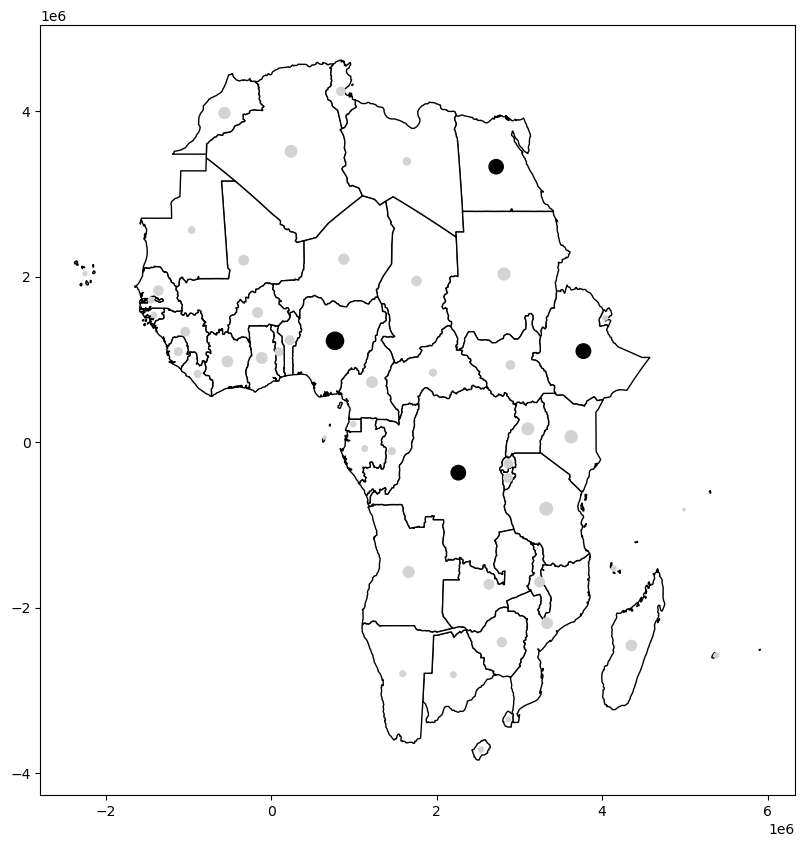

In [233]:
base = Africa_8857.plot(color='white', edgecolor='black', figsize=(10,10))

# Define your color map
mapcolor = {1: 'black', 0: 'lightgrey'}

# Plot the centroids on top
Africa_8857_centroids.plot(
    ax=base,
    markersize=Africa_8857_centroids['size'],
    color=Africa_8857_centroids['population_outlier'].map(mapcolor)
)

Here, we do a good job for outliers, but it is difficult to interprete the other ones. We could use some redundancy, but more work is needed:
1. Create two maps of centroids:

In [235]:
Africa_8857_centroids_out=Africa_8857_centroids[Africa_8857_centroids.population.isin(outliers)]
Africa_8857_centroids_no_out=Africa_8857_centroids[~Africa_8857_centroids.population.isin(outliers)]

2. Compute sizes in each:

In [236]:
Africa_8857_centroids_out['size'] = Africa_8857_centroids_out['population'].apply(lambda x: x**0.5/ 50)
Africa_8857_centroids_no_out['size'] = Africa_8857_centroids_no_out['population'].apply(lambda x: x**0.5/ 50)

/opt/anaconda3/envs/spatial_311py/lib/python3.11/site-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Now, plot the three layers, using some color gradient for the non-outliers:

<Axes: >

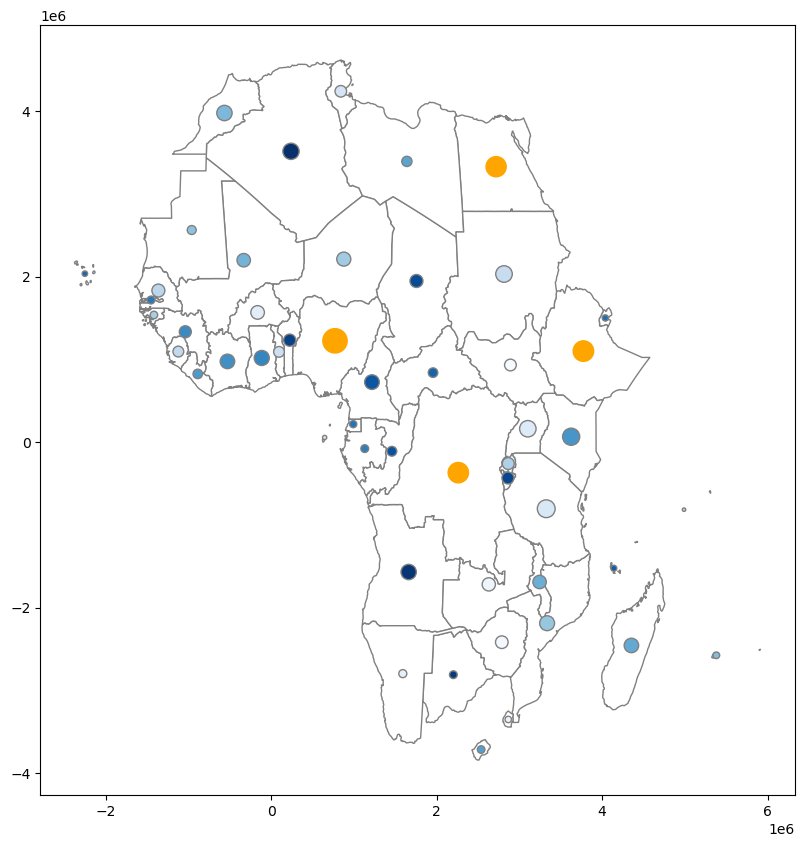

In [237]:
base=Africa_8857.plot(color='white', edgecolor='grey',figsize=(10,10)) 

Africa_8857_centroids_no_out.plot(
    ax=base,
    markersize=Africa_8857_centroids_no_out['size'],
    edgecolor='grey',
    c=Africa_8857_centroids_no_out['size'],
    cmap='Blues_r'
)
Africa_8857_centroids_out.plot(
    ax=base,
    markersize=Africa_8857_centroids_out['size'],
    color='orange'
)

# Choropleths

## Transformation of data values

### Re Scaling

We should plan how to color the polygons based on some variable, let me check our variables of interest:

In [ ]:
DataNames=['fragility', 'co2', 'ForestRev_gdp']

In [ ]:

pd.melt(theMapAndData[DataNames])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(pd.melt(theMapAndData[DataNames]),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

The variables are in different units, we should try a data rescaling strategy:

In [ ]:
# !pip install -U scikit-learn

* **StandardScaler**:

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(theMapAndData[DataNames])
sns.displot(pd.melt(pd.DataFrame(normalized_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

* **MinMaxScaler**:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data=scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(scaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

* **RobustScaler**:

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
robScaled_data = scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(robScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

* **QuantileTransformer**:

In [ ]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=99, random_state=0,output_distribution='normal') #or 'uniform'
QtScaled_data = scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(QtScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

Let's keep the last one:

In [ ]:
theMapAndData['fragility_Qt']=QtScaled_data[:,0]

### Discretizing

I will keep the _data_Qt_ data frame. Now, I want cut the data.
Please install [**numba**](https://numba.readthedocs.io/en/stable/user/installing.html) before runing the next code; also make sure you have **pysal**, **mapclassify** and **numpy** installed:

In [ ]:
! pip show numba mapclassify numpy

In [ ]:
# !pip install mapclassify

Let me discretize **fragility_Qt**:

In [ ]:
import mapclassify
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=theMapAndData.fragility_Qt
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

How can we select the right classification?
Let me use the the Absolute deviation around class median (ADCM) to make the comparisson:

In [ ]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

Now, plot the **adcms**:

In [ ]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

Let's save the best strategy:

In [ ]:
theMapAndData['fragility_Qt_jc5'] = jc5.yb

In [ ]:
# there you are
theMapAndData[['fragility_Qt','fragility_Qt_jc5']].head()

Let's check the mean of 'fragility_Qt' by the labels of the columns created (from '0' to '4')

In [ ]:
indexList=['fragility_Qt_jc5'] # add more?
aggregator={'fragility_Qt': ['mean']}

pd.concat([theMapAndData[['fragility_Qt',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

We could create a new column:

In [ ]:
# renaming
newLabelsForLevels={0:"0_Great", 1:"1_Good", 2:"2_Middle", 3:"3_Bad", 4:"4_Poor"}

theMapAndData['fragility_Qt_jc5_cat']=theMapAndData.loc[:,'fragility_Qt_jc5'].replace(newLabelsForLevels)

# we have
theMapAndData[['fragility_Qt','fragility_Qt_jc5','fragility_Qt_jc5_cat']].head(20)

We are ready for a choropleth:

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='fragility_Qt_jc5_cat', # variable to plot
                   cmap='viridis', # set of colors
                   categorical=True, # can be interpreted as category
                   edgecolor='white', # border color
                   linewidth=0., # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # need a legend?
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"},
        ax=ax
       )

ax.set_axis_off()

However, once you know the ADCM, you can request the choropleth without creating a variable:

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='fragility_Qt',
                   cmap='OrRd',
                   scheme="jenkscaspall",k=5,
        edgecolor='grey',
        linewidth=0.5,
        alpha=1,
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

In [ ]:
# finally

theMapAndData.to_file(os.path.join("maps","worldMaps.gpkg"), layer='indicators', driver="GPKG")